# Compare container dwell time distribution with results

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import conflowgen

Load previously defined data.

In [2]:
conflowgen.setup_logger(
    logging_directory="./data/logger",  # use subdirectory relative to Jupyter Notebook
)

database_chooser = conflowgen.DatabaseChooser(
    sqlite_databases_directory="../../data/databases"  # use subdirectory relative to Jupyter Notebook
)
#file_name = "demo_deham_cta.sqlite"
file_name = "demo_poc.sqlite"

database_chooser.load_existing_sqlite_database(file_name)

08.08.2022 15:45:33 +0200 - conflowgen - DEBUG - Creating log file at ./data/logger\2022-08-08--15-45-33.log
08.08.2022 15:45:33 +0200 - conflowgen - DEBUG - Opening file C:\git-repos\Datengenerierung\conflowgen\conflowgen\data\databases\demo_poc.sqlite
08.08.2022 15:45:33 +0200 - conflowgen - DEBUG - journal_mode: wal
08.08.2022 15:45:33 +0200 - conflowgen - DEBUG - cache_size: -32768
08.08.2022 15:45:33 +0200 - conflowgen - DEBUG - page_size: 4096
08.08.2022 15:45:33 +0200 - conflowgen - DEBUG - foreign_keys: 1
08.08.2022 15:45:33 +0200 - conflowgen - DEBUG - Open existing database at C:\git-repos\Datengenerierung\conflowgen\conflowgen\data\databases\demo_poc.sqlite


In [3]:
container_dwell_time_analysis_report = conflowgen.ContainerDwellTimeAnalysisReport()
container_dwell_time_analysis = container_dwell_time_analysis_report.analysis

## Container dwell time of standard containers

In [4]:
container_dwell_time_distribution_manager = conflowgen.ContainerDwellTimeDistributionManager()
distributions = container_dwell_time_distribution_manager.get_container_dwell_time_distribution()

No traffic from barge to barge
No traffic from barge to train
No traffic from barge to feeder
No traffic from barge to truck
No traffic from barge to deep_sea_vessel
No traffic from train to barge
No traffic from train to train


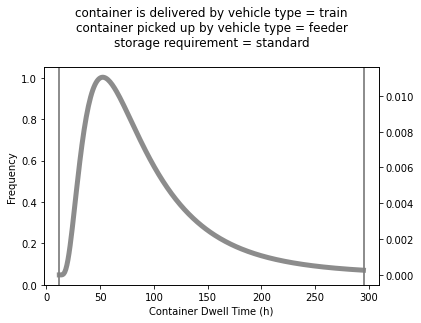

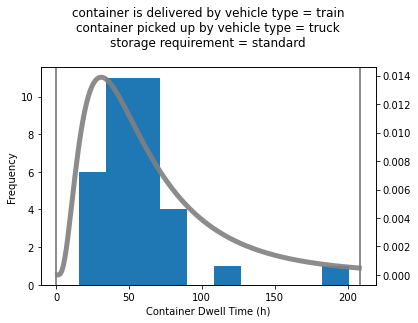

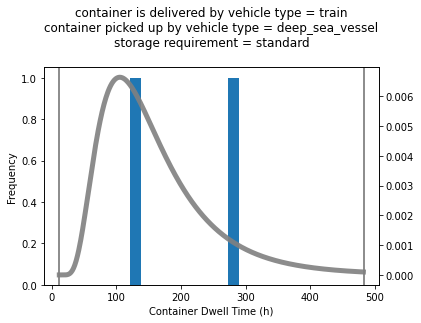

No traffic from feeder to barge


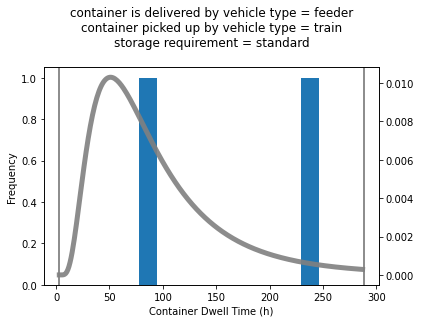

No traffic from feeder to feeder


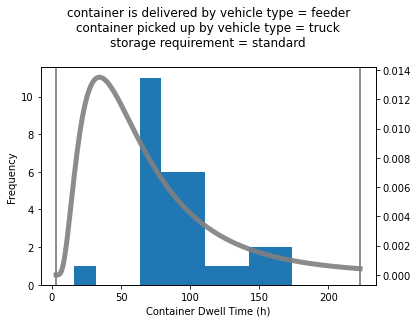

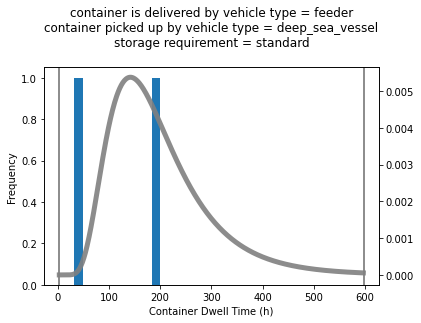

No traffic from truck to barge
No traffic from truck to train


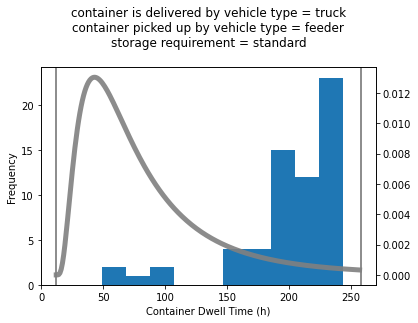

No traffic from truck to truck


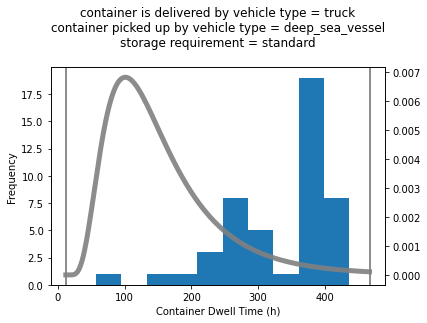

No traffic from deep_sea_vessel to barge


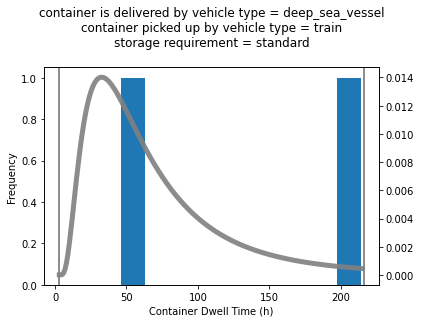

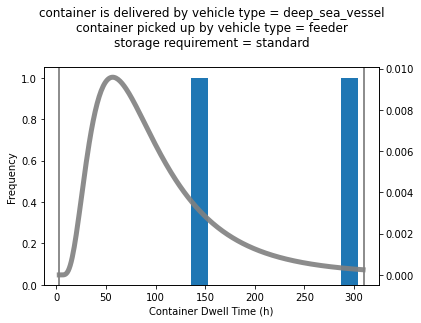

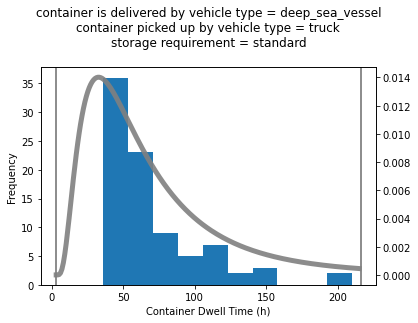

No traffic from deep_sea_vessel to deep_sea_vessel


In [5]:
for inbound_vehicle_type in set(conflowgen.ModeOfTransport):
    for outbound_vehicle_type in set(conflowgen.ModeOfTransport):
        container_dwell_times = container_dwell_time_analysis.get_container_dwell_times(
            container_delivered_by_vehicle_type=inbound_vehicle_type,
            container_picked_up_by_vehicle_type=outbound_vehicle_type,
            storage_requirement=conflowgen.StorageRequirement.standard
        )
        if not container_dwell_times:
            print(f"No traffic from {inbound_vehicle_type} to {outbound_vehicle_type}")
            continue
        fig, ax = plt.subplots()
        ax1 = container_dwell_time_analysis_report.get_report_as_graph(
            container_delivered_by_vehicle_type=inbound_vehicle_type,
            container_picked_up_by_vehicle_type=outbound_vehicle_type,
            storage_requirement=conflowgen.StorageRequirement.standard
        )
        
        distribution = distributions[
            inbound_vehicle_type][outbound_vehicle_type][conflowgen.StorageRequirement.standard]
        plt.axvline(distribution.minimum, color="dimgray")
        plt.axvline(distribution.maximum, color="dimgray")
        x = np.linspace(0, int(distribution.maximum), int(distribution.maximum))

        x_in_range = x[np.where((distribution.minimum < x) & (x < distribution.maximum))]
        
        ax2 = ax1.twinx()

        ax2.plot(
            x_in_range,
            distribution.get_probabilities(x_in_range),
            color='gray',
            lw=5,
            alpha=0.9,
        )
        plt.show()

In [6]:
text = container_dwell_time_analysis_report.get_report_as_text(
    container_delivered_by_vehicle_type=conflowgen.ModeOfTransport.truck,
    container_picked_up_by_vehicle_type=conflowgen.ModeOfTransport.feeder,
    storage_requirement=conflowgen.StorageRequirement.standard
)
print(text)


container is delivered by vehicle type = truck
container picked up by vehicle type = feeder
storage requirement = standard
                                       (reported in h)
minimum container dwell time:                     49.0
average container dwell time:                    199.3
maximum container dwell time:                    244.0
standard deviation:                               45.3
(rounding errors might exist)



In [7]:
distribution = distributions[
    conflowgen.ModeOfTransport.truck][
    conflowgen.ModeOfTransport.feeder][
    conflowgen.StorageRequirement.standard]

distribution

<ClippedLogNormal: avg=85.9h, min=12.0h, max=257.8h, var=4296.0h², rev=False>

In [8]:
#database_chooser.close_connection()